# Tesing Accuracy of Integration Methods

## Import

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from integrator import euler, rk2, rk4

## Create Functions

I will be testing accuracy over a predefined function $\frac{\mathrm{dy}}{\mathrm{dt}}$ and solution $\mathrm{y}$

I will use $\frac{\mathrm{dy}}{\mathrm{dx}} = x^2 + xy$  and $y(x) = -x + \frac{\sqrt{\pi}\:\mathrm{erf}(\frac{x}{\sqrt{2}})}{\sqrt{2}\:\mathrm{e}^{-\frac{x^2}{2}}} + c_1\mathrm{e}^{\frac{x^2}{2}}$

I will also just assume that $c_1 = 1$, but I will leave this as a changable parameter

In [2]:
def derivative(x, y):
    """
    Derivative of function y(x)
    """
    return (x**2) + (x * y)

def solution(x, c_1=1):
    """
    Exact solution to derivative above
    """
    frac_upper = (math.sqrt(math.pi) * math.erf(x / math.sqrt(2)))
    frac_lower = math.sqrt(2) * math.exp(-1 * 0.5 * (x**2))
    term_3 = c_1 * math.exp(0.5 * (x**2))
    return (-1 * x) + (frac_upper / frac_lower) + term_3

Next, I will create a `percent_error` functon

In [3]:
def percent_error(actual, expected):
    return abs((actual - expected) / expected) * 100

Next, I will create a function to compute the error of each method

In [4]:
def compute_error(method, x0, x_end, derivative, exact_solution, h=1e-6):
    y0 = exact_solution(x0)
    return percent_error(method(derivative, y0, x0, x_end, h), exact_solution(x_end) - exact_solution(x0))

Finally, I will create a function to graph error versus step size

In [8]:
def plot_error_curve(method, x0, x_end, derivative, exact_solution):
    steps = np.logspace(-6, 0, 50)[::-1]  # Decreasing steps from 1 to 1e-8
    errors = [compute_error(method, x0, x_end, derivative, exact_solution, h) for h in steps]
    
    plt.figure(figsize=(8, 6))
    plt.loglog(steps, errors, '-o')
    plt.grid(True)
    plt.xlabel('Step size (h)')
    plt.ylabel('Error')
    plt.title('Error vs Step Size')
    plt.show()

## Testing

Now, we get to testing

First, I will test the Euler method

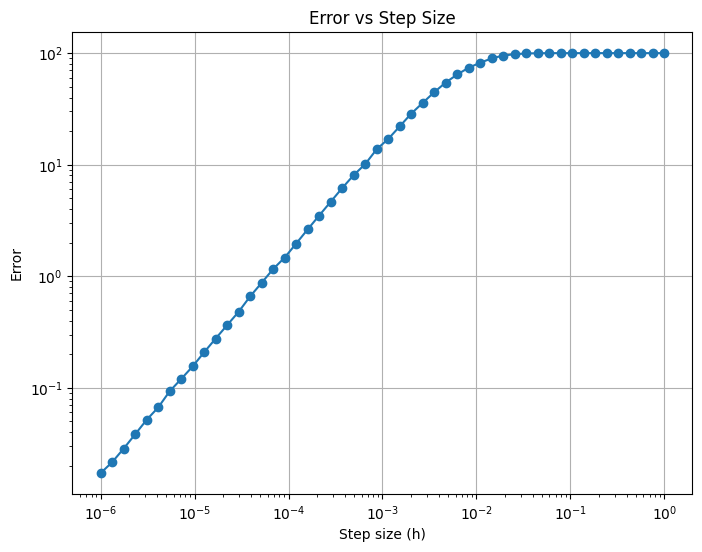

In [9]:
plot_error_curve(euler, 0, 10, derivative, solution)

Next, I will test the Runge-Kutta Second Order method

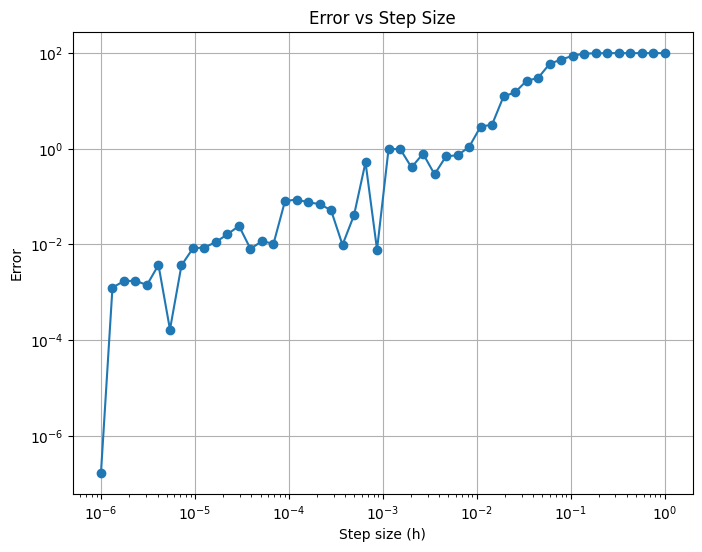

In [12]:
plot_error_curve(rk2, 0, 10, derivative, solution)

Finally, I will test the Runge-Kutta Fourth Order Method

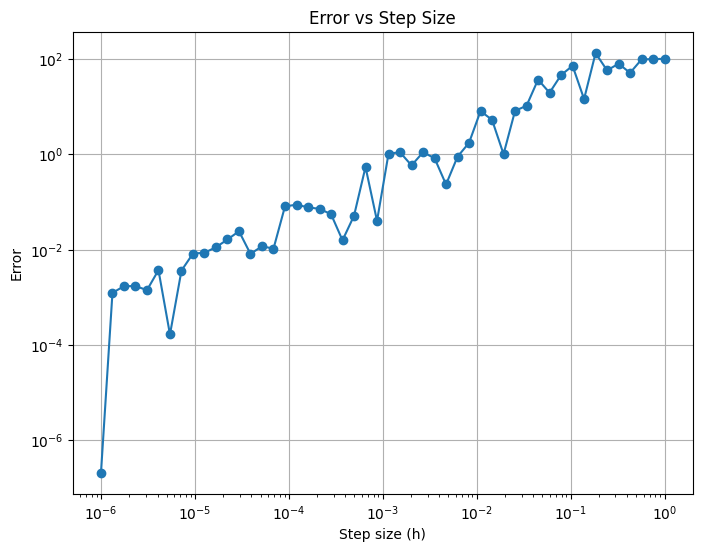

In [13]:
plot_error_curve(rk4, 0, 10, derivative, solution)

Here we can see that the Runge-Kutta methods are far more accurate than Euler, but the difference between the two Runge-Kutta methods is negligible at this scale and the Fourth Order method took far longer too run than the Second Order.